# A PCA example in Octave
## First, we build the data, in our case, a matrix with 400 points in 4D 

In [1]:
M = ones(400, 4);
for i = 1:400
    M(i,1) = i;
    M(i,2) = log(i);
    M(i,3) = rand()*100;
    M(i,4) = log(i*1.5);
endfor

In [2]:
M(1:5,:)
M(395:400,:)

ans =

    1.00000    0.00000   80.71911    0.40547
    2.00000    0.69315   49.39825    1.09861
    3.00000    1.09861    1.92795    1.50408
    4.00000    1.38629   57.80923    1.79176
    5.00000    1.60944   61.80150    2.01490

ans =

   395.0000     5.9789    92.3044     6.3844
   396.0000     5.9814    83.2247     6.3869
   397.0000     5.9839    50.8390     6.3894
   398.0000     5.9865    83.8470     6.3919
   399.0000     5.9890    95.0023     6.3944
   400.0000     5.9915     7.6858     6.3969



## Plot our data
With 4 dimensions we will use a 3D scatter plot, codifying color in the additional dimension

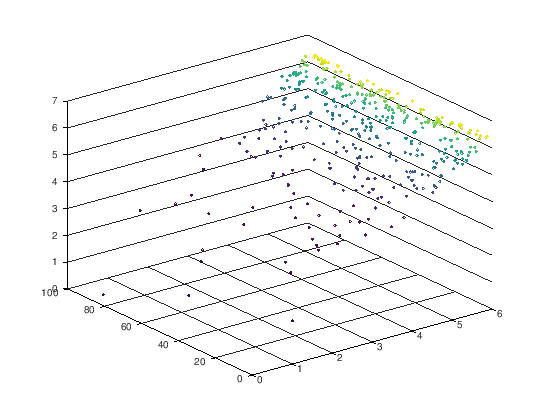

In [3]:
%plot -f png
% We plot a 3D scatter plot with color given by M(:,1)
scatter3(M(:,2), M(:,3), M(:,4), [], M(:,1))

## Plot a series of 1 x 1 scatters
With that we can have a better understanding of how each dimension relate to each other

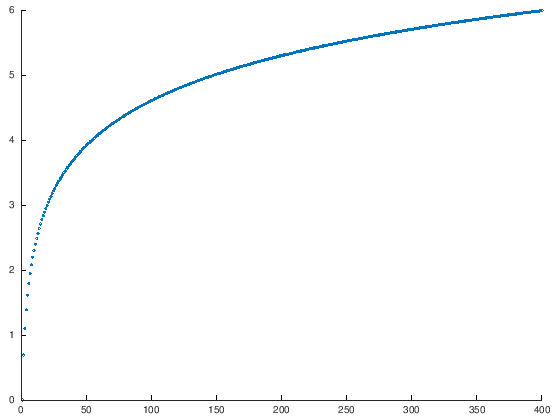

In [4]:
scatter(M(:,1), M(:,2))

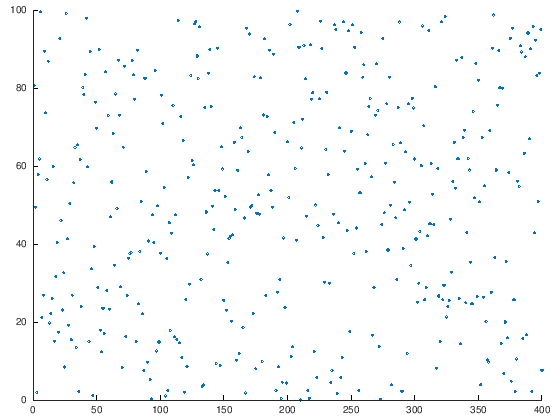

In [5]:
scatter(M(:,1), M(:,3))

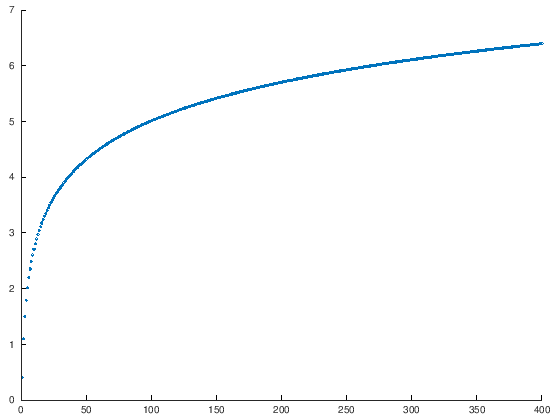

In [6]:
scatter(M(:,1), M(:,4))

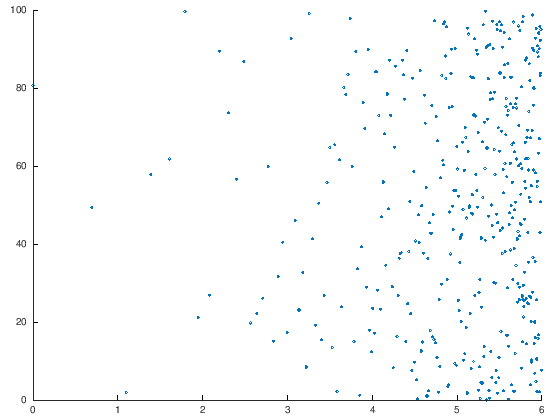

In [7]:
scatter(M(:,2), M(:,3))

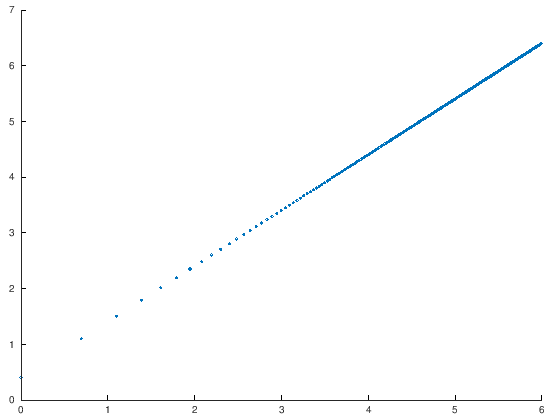

In [8]:
scatter(M(:,2), M(:,4))

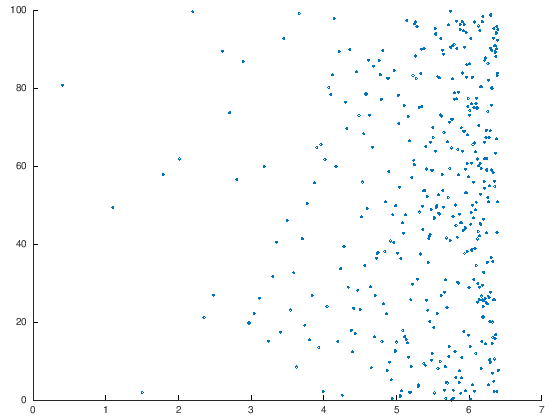

In [9]:
scatter(M(:,4), M(:,3))

## We can also plot a series of 3D scatters
Leaving one dimension out per plot

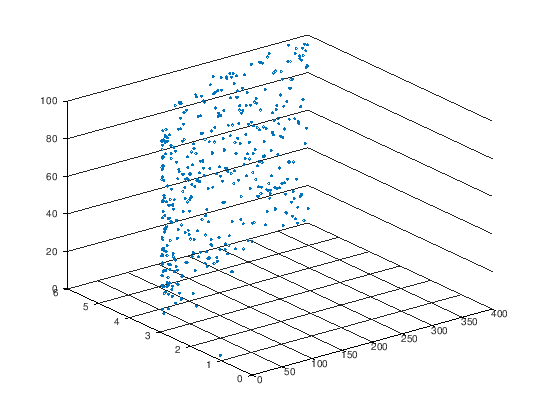

In [10]:
scatter3 (M(:,1), M(:,2), M(:,3))

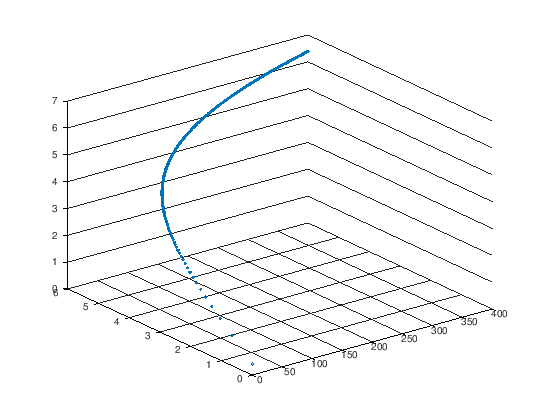

In [11]:
scatter3 (M(:,1), M(:,2), M(:,4))

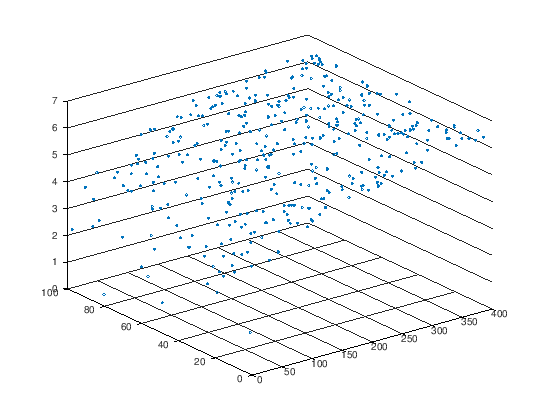

In [12]:
scatter3 (M(:,1), M(:,3), M(:,4))

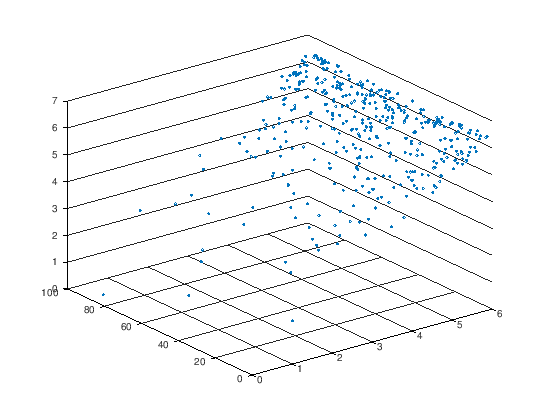

In [13]:
scatter3 (M(:,2), M(:,3), M(:,4))

## Normalize the data

$\frac{M - \bar M}{s}$


In [14]:
M = (M - mean(M))./std(M);
M(1:5,:)
M(395:400,:)

ans =

  -1.725565  -5.146305   1.053076  -5.146305
  -1.716916  -4.433054  -0.013281  -4.433054
  -1.708266  -4.015829  -1.629467  -4.015829
  -1.699617  -3.719803   0.273081  -3.719803
  -1.690967  -3.490188   0.409003  -3.490188

ans =

   1.682318   1.005989   1.447513   1.005989
   1.690967   1.008590   1.138383   1.008590
   1.699617   1.011186   0.035771   1.011186
   1.708266   1.013774   1.159568   1.013774
   1.716916   1.016357   1.539365   1.016357
   1.725565   1.018932  -1.433435   1.018932



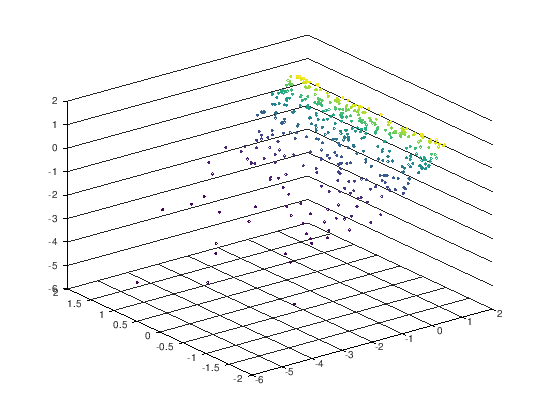

In [15]:
scatter3(M(:,2), M(:,3), M(:,4), [], M(:,1))

## Compute the covariance matrix
$\Sigma = \frac{M^{T}M}{(sampleSize - 1)}$

In [16]:
sigma = (M'*M)/(size(M, 1)-1)

sigma =

   1.000000   0.879231   0.083329   0.879231
   0.879231   1.000000   0.057805   1.000000
   0.083329   0.057805   1.000000   0.057805
   0.879231   1.000000   0.057805   1.000000



## Get the eigenvalues and eigenvectors with SVD
#### By applying the singular value decomposition algorithm to the covariance matrix we get a set of unitary eigenvectors and their eigenvalues
* $U$ is the eigenvector matrix, each column is an eigenvector.
* $S$ is the diagonal eigenvalue matrix, diagonal values correspond to eigenvector scales.

In [17]:
[U, S, V] = svd(sigma)

U =

  -5.5925e-01   1.1523e-02  -8.2892e-01  -7.4328e-16
  -5.8456e-01   4.7236e-02   3.9504e-01  -7.0711e-01
  -6.1811e-02  -9.9770e-01   2.7832e-02   1.0430e-18
  -5.8456e-01   4.7236e-02   3.9504e-01   7.0711e-01

S =

Diagonal Matrix

   2.8473e+00            0            0            0
            0   9.9356e-01            0            0
            0            0   1.5917e-01            0
            0            0            0   1.2792e-18

V =

  -0.55925   0.01152  -0.82892   0.00000
  -0.58456   0.04724   0.39504  -0.70711
  -0.06181  -0.99770   0.02783   0.00000
  -0.58456   0.04724   0.39504   0.70711



## Transform the data and plot
* $PCA = M\times U$

Note that the 4 dimensions do not have the same meaning here, as the whole data was tranformed (translated, compressed, rotated).

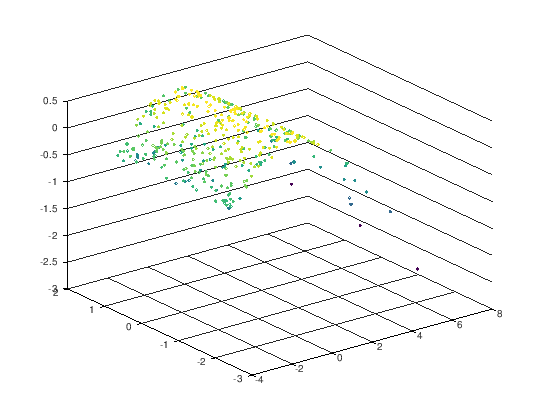

In [18]:
PCA = M*U;
scatter3(PCA(:,1), PCA(:,2), PCA(:,3), [], PCA(:,4))

## Restore our data
- $M$ is our original data
- $PCA = M\times U$
- $U$ is unitary $\rightarrow U\times U^{T} = U^{T}\times U = I$
- $\rightarrow PCA \times U^{T} = M \times U \times U^{T} = M \times I = M$

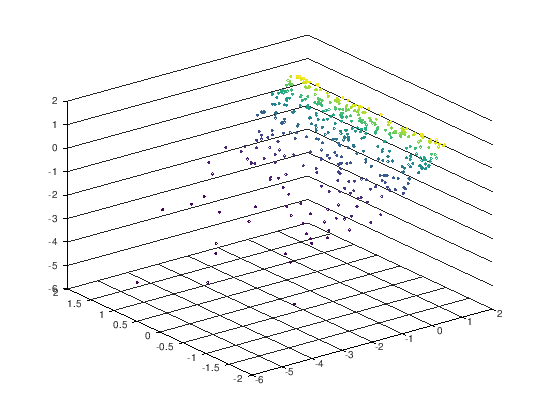

In [19]:
Mr = PCA*U';
scatter3(Mr(:,2), Mr(:,3), Mr(:,4), [], Mr(:,1))

## As precision is limited, there is a small error after the computations.

In [20]:
mean(abs(M-Mr))

ans =

   6.4725e-16   7.0718e-16   3.0528e-16   7.2827e-16



## With PCA you can also reduce the data dimensions
* $PCAr = M \times U_{k}$ where $U_{k}$ are the first $k$ columns of $U$

For the first example we will reduce the original data from $4\rightarrow 2$ dimensions

In [21]:
PCAr=M*U(:,1:2);
size(PCAr)

ans =

   400     2



## *Recover* the data
To original data is not properly recovered, as the information for some dimensions were lost on the first transformation.
* $M$ is our original data
* $PCA = M\times U_k \rightarrow M_k = PCA \times U^{T}_k = M\times U_k \times U^{T}_k$

In [22]:
Mk = PCAr*U(:,1:2)';

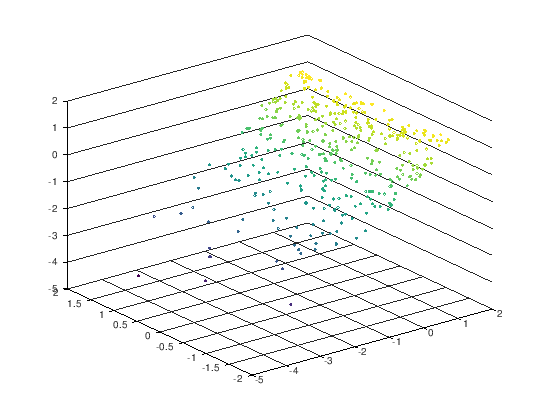

In [23]:
scatter3(Mk(:,2), Mk(:,3), Mk(:,4), [], Mk(:,1))

## But now, error is not negligible

In [24]:
mean(abs(M-Mk))

ans =

   0.2573297   0.1226362   0.0086403   0.1226362



## What about $4\rightarrow 3\rightarrow 4$ dimensions?
Discarding just one dimension and restoring it back does not produce a big error, in our case.
* Why is that?
  * Hints
    * Take a look at S (from the SVD decomposition)
    * Take a look at how the matrix was built
    * Take a look at the scatter plots

ans =

   400     3

ans =

   6.4952e-16   3.0841e-15   3.0290e-16   3.1372e-15



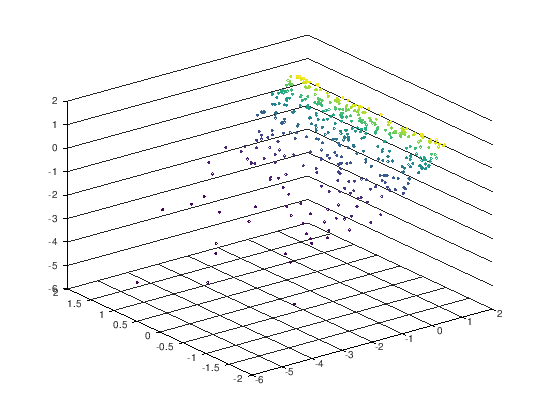

In [25]:
PCAr=M*U(:,1:3);
size(PCAr)
Mk = PCAr*U(:,1:3)';
mean(abs(M-Mk))
scatter3(Mk(:,2), Mk(:,3), Mk(:,4), [], Mk(:,1))

## What happens if we discard and then restore 3 dimensions?

ans =

   400     1

ans =

   0.25786   0.12522   0.85251   0.12522



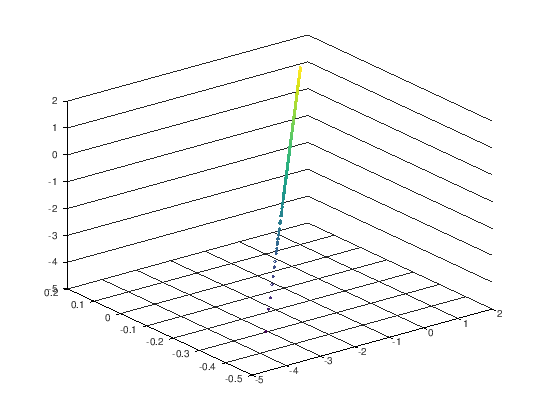

In [26]:
PCAr=M*U(:,1);
size(PCAr)
Mk = PCAr*U(:,1)';
mean(abs(M-Mk))
scatter3(Mk(:,2), Mk(:,3), Mk(:,4), [], Mk(:,1))